**DSA_LAB_ASGN_6_KNN**

**Rishav_Kumar**

**22206205**

**IT-01**

**Q6_1)** Implement the K-means clustering algorithm on the given dataset.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "kmeans_blobs.csv"
df = pd.read_csv(file_path)

# Normalize the dataset (Min-Max Scaling)
df_normalized = (df - df.min()) / (df.max() - df.min())

# K-means clustering function
def k_means_clustering(data, k, max_iters=100, tol=1e-4):
    # Randomly initialize k centroids
    np.random.seed(42)
    centroids = data.sample(n=k).to_numpy()

    for _ in range(max_iters):
        # Compute distances and assign clusters
        distances = np.linalg.norm(data.to_numpy()[:, np.newaxis] - centroids, axis=2)
        cluster_labels = np.argmin(distances, axis=1)

        # Compute new centroids
        new_centroids = np.array([data[cluster_labels == i].mean(axis=0) for i in range(k)])

        # Convergence check
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return cluster_labels, centroids

# Run K-means for k=2 and k=3
for k in [2, 3]:
    labels, centroids = k_means_clustering(df_normalized, k)

**Q6_2)** In your report, you should have 2 plots - one for k = 2 and 
the other for k = 3. In the plot, you need to plot the give 
dataset and u e different colors to show points belonging to a
particular cluster.

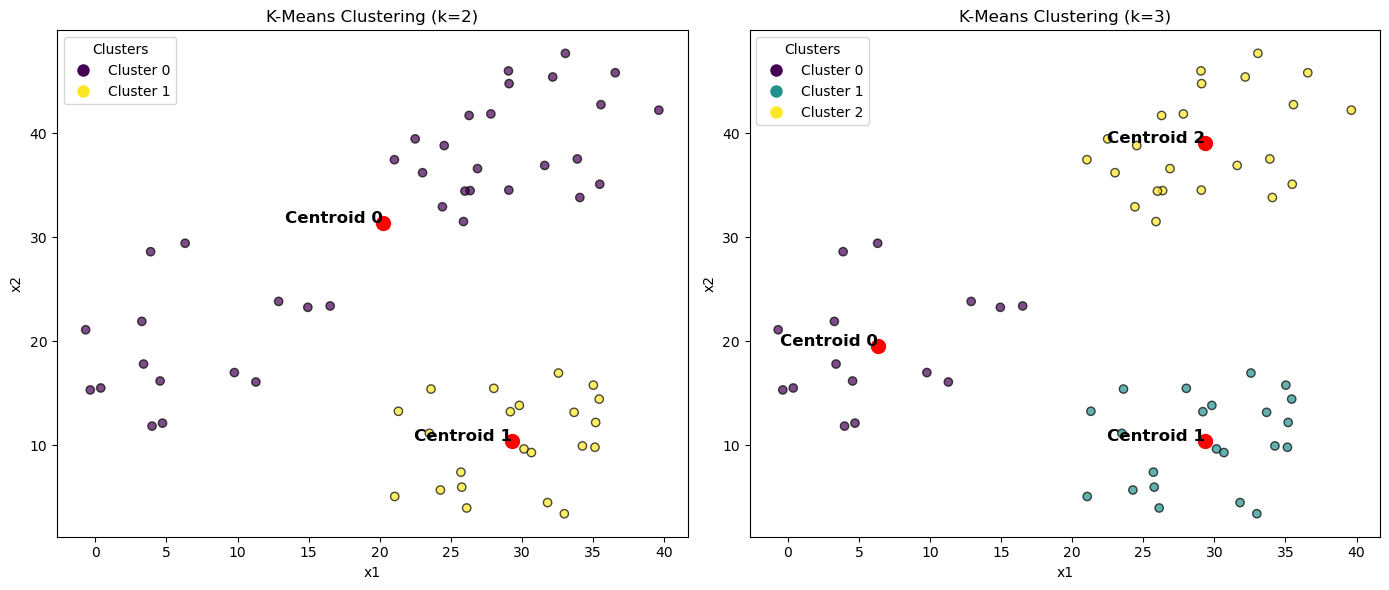

In [33]:
# Run K-means for k=2 and k=3 and plot results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for idx, k in enumerate([2, 3]):
    labels, centroids = k_means_clustering(df_normalized, k)

    # Scatter plot for clustering
    scatter = axes[idx].scatter(df['x1'], df['x2'], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
    centroids_x = centroids[:, 0] * (df['x1'].max() - df['x1'].min()) + df['x1'].min()
    centroids_y = centroids[:, 1] * (df['x2'].max() - df['x2'].min()) + df['x2'].min()

    # Plot centroids with labels
    axes[idx].scatter(centroids_x, centroids_y, c='red', s=100, label='Centroids')
    for i, (x, y) in enumerate(zip(centroids_x, centroids_y)):
        axes[idx].text(x, y, f'Centroid {i}', fontsize=12, ha='right', color='black', fontweight='bold')

    axes[idx].set_xlabel('x1')
    axes[idx].set_ylabel('x2')
    axes[idx].set_title(f'K-Means Clustering (k={k})')
    
    legend_labels = {i: f'Cluster {i}' for i in range(k)}
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
               for i in range(k)]
    axes[idx].legend(handles, legend_labels.values(), title="Clusters")

plt.tight_layout()
plt.show()
